In [1]:
import itertools

# Pandas
import pandas as pd

# Numpy
import numpy as np

# missingno - Visualização completude dados
# https://github.com/ResidentMario/missingno
import missingno as msno
%matplotlib inline

# Bokeh
# Instalação: 
# $ conda install bokeh
# ou
# $ pip install bokeh
from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

In [2]:
# Importação dos dados
df_Aluno = pd.read_json('thiago/Aluno.json')
df_BeneficioGovernoFederal = pd.read_json("thiago/BeneficioGovernoFederal.json")
df_Caracterizacao = pd.read_json("thiago/Caracterizacao.json")
df_CompanhiaDomiciliar = pd.read_json("thiago/CompanhiaDomiciliar.json")
df_ContribuinteRendaFamiliar = pd.read_json("thiago/ContribuinteRendaFamiliar.json")
df_CursoCampus = pd.read_json("thiago/CursoCampus.json")
df_EstadoCivil = pd.read_json("thiago/EstadoCivil.json")
df_Idioma = pd.read_json("thiago/Idioma.json")
df_MatriculaPeriodo = pd.read_json("thiago/MatriculaPeriodo.json")
df_MeioTransporte = pd.read_json("thiago/MeioTransporte.json")
df_NecessidadeEspecial = pd.read_json("thiago/NecessidadeEspecial.json")
df_Raca = pd.read_json("thiago/Raca.json")
df_RazaoAfastamentoEducacional = pd.read_json("thiago/RazaoAfastamentoEducacional.json")
df_SituacaoMatricula = pd.read_json("thiago/SituacaoMatricula.json")
df_SituacaoMatriculaPeriodo = pd.read_json("thiago/SituacaoMatriculaPeriodo.json")
df_SituacaoTrabalho = pd.read_json("thiago/SituacaoTrabalho.json")
df_TipoAcessoInternet = pd.read_json("thiago/TipoAcessoInternet.json")
df_TipoAreaResidencial = pd.read_json("thiago/TipoAreaResidencial.json")
df_TipoEscola = pd.read_json("thiago/TipoEscola.json")
df_TipoImovelResidencial = pd.read_json("thiago/TipoImovelResidencial.json")
df_TipoServicoSaude = pd.read_json("thiago/TipoServicoSaude.json")

In [3]:
#merge entre as tabelas 
df = pd.merge(df_Caracterizacao, df_Aluno, left_on="aluno_id", right_on="id", suffixes=["_L", "_R"])
df = pd.merge(df, df_CursoCampus, left_on="curso_campus_id", right_on="id", suffixes=["_L", "_curso"])
df = pd.merge(df, df_Raca, left_on="raca_id", right_on="id", suffixes=["_curso", "_raca"])
df = pd.merge(df, df_EstadoCivil, left_on="estado_civil_id", right_on="id")
df = pd.merge(df, df_SituacaoMatricula, left_on="situacao_id", right_on="id", suffixes=["_civil", "_situacao"])

#filtrando dados
df_Perfil_Situacao = df[['renda_per_capita', 'descricao_raca', 'descricao_civil', 'descricao_situacao']]
df_Perfil_Situacao

,renda_per_capita,descricao_raca,descricao_civil,descricao_situacao
0,0.00,Parda,Solteiro(a),Evasão
1,0.20,Parda,Solteiro(a),Evasão
2,1.17,Parda,Solteiro(a),Evasão
3,0.57,Parda,Solteiro(a),Evasão
4,0.54,Parda,Solteiro(a),Evasão
5,0.50,Parda,Solteiro(a),Evasão
6,0.29,Parda,Solteiro(a),Evasão
7,0.14,Parda,Solteiro(a),Evasão
8,0.40,Parda,Solteiro(a),Evasão
9,0.17,Parda,Solteiro(a),Evasão


In [4]:
racas = ["Parda", "Preta", "Branca", "Indígena", "Amarela", "Não declarado"]
estados_civis = ["Solteiro(a)", "Casado(a)", "União Estável", "Divorciado(a)", "Viúvo(a)", "Não declarado"]

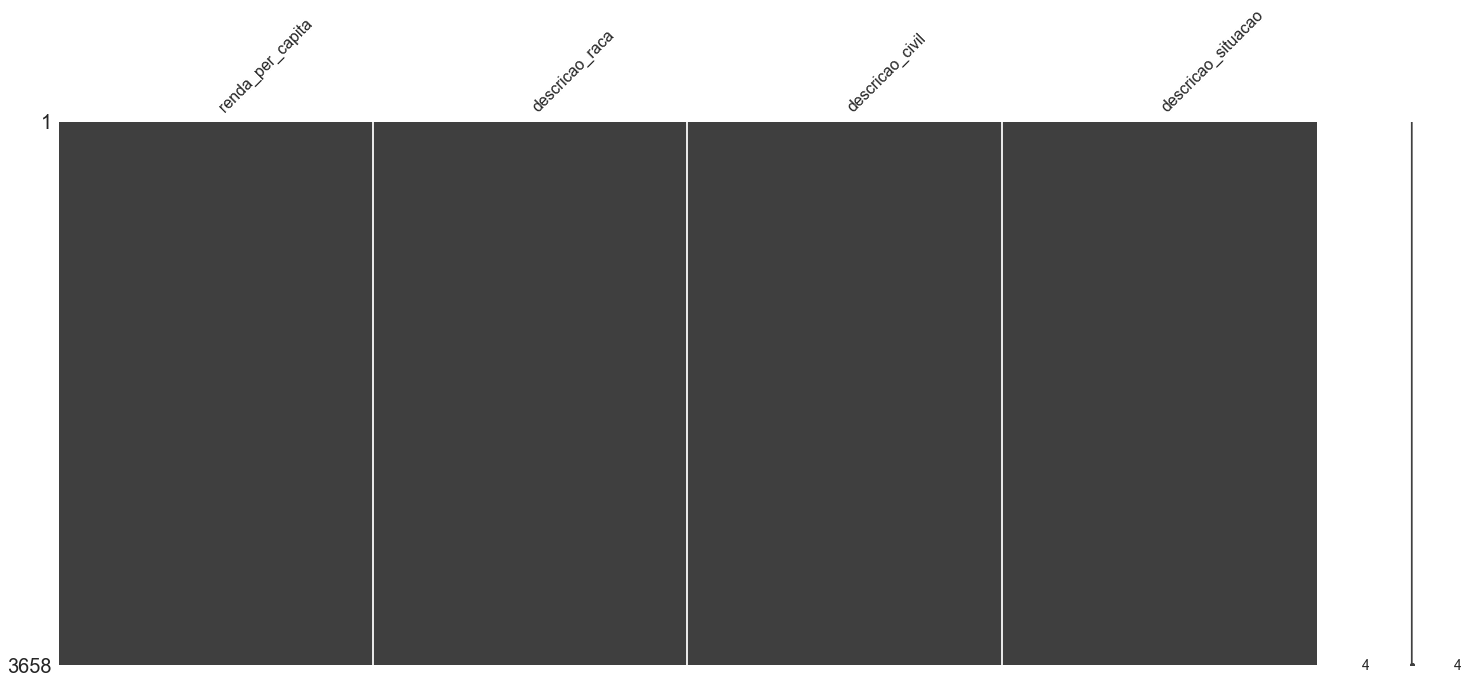

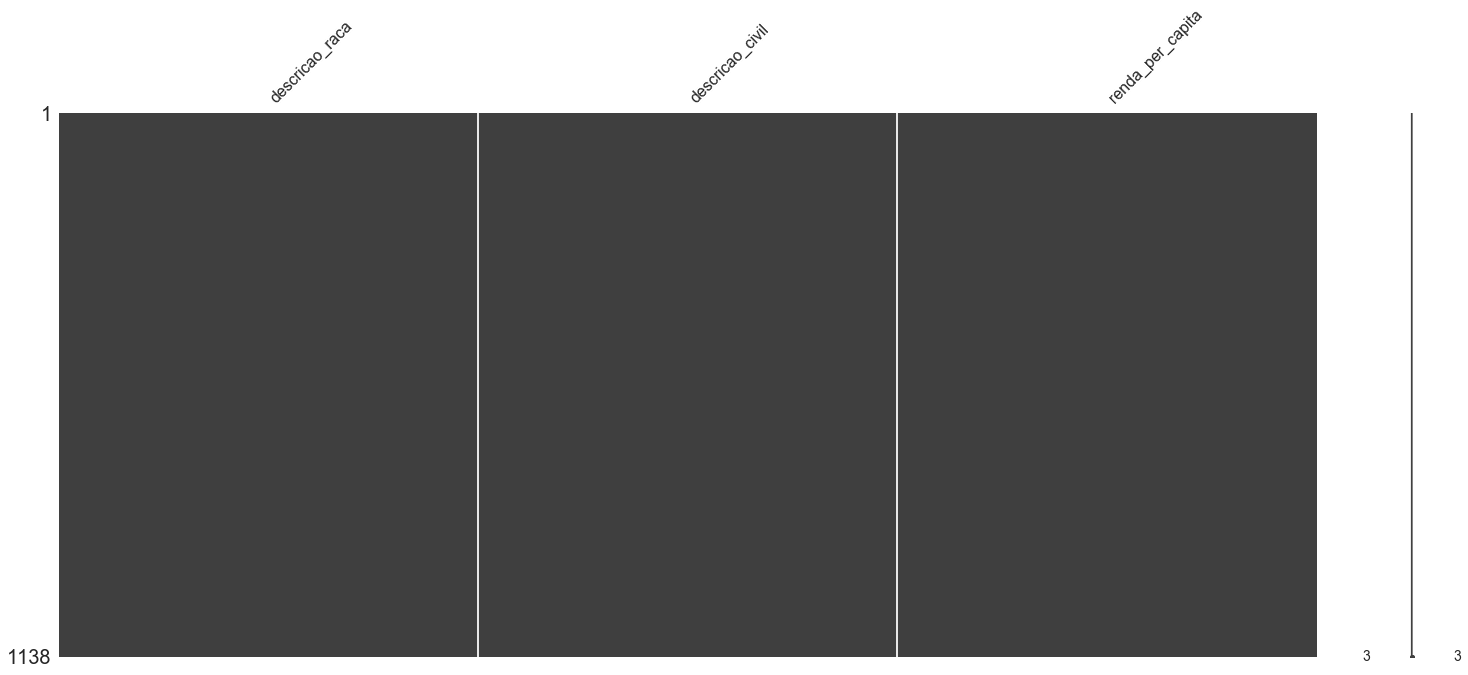

In [5]:
df_Perfil_Matriculado = df_Perfil_Situacao[df_Perfil_Situacao.descricao_situacao == "Matriculado"][['descricao_raca', 'descricao_civil', 'renda_per_capita']]
# df_Perfil_Matriculado
renda = df_Perfil_Matriculado.groupby(['descricao_raca', 'descricao_civil']).aggregate(['mean', 'count'])
renda['renda_per_capita']['mean']
# renda
df_Perfil_Situacao = df_Perfil_Situacao.dropna()
df_Perfil_Matriculado = df_Perfil_Matriculado.dropna()
msno.matrix(df_Perfil_Situacao)
msno.matrix(df_Perfil_Matriculado)

In [6]:
x_raca = []
y_estado_civil = []
renda_media_per_capita = []
qtd_alunos_situacao = []

max_renda = 20
max_qtd = renda['renda_per_capita']['count'].max()
for raca, estado_civil in itertools.product(racas, estados_civis):
    x_raca.append(raca)
    y_estado_civil.append(estado_civil)
    if (raca, estado_civil) in renda['renda_per_capita']['mean'].index:
        renda_media_norm = renda['renda_per_capita']['mean'][raca][estado_civil]/max_renda
        cor_base_renda = renda_media_norm * 255
        renda_media_per_capita.append("#%02x%02x%02x" % (int(255 - cor_base_renda), int(cor_base_renda), 0))
        qtd_alunos_situacao.append(.9*(renda['renda_per_capita']['count'][raca][estado_civil]/max_qtd) + .1)
    else:
        renda_media_per_capita.append("#FFFFFF")
        qtd_alunos_situacao.append(0)

hm = figure(title="Perfil situação matriculado",
            tools="hover",
            toolbar_location=None,
            x_range=racas,
            y_range=estados_civis)

hm.rect(x_raca,
        y_estado_civil,
        color=renda_media_per_capita,
        alpha=np.ceil(qtd_alunos_situacao),
        fill_alpha=qtd_alunos_situacao, line_width=4,
        width=.96,
        height=.96)

show(hm)

In [7]:
x_raca = []
y_estado_civil = []
renda_media_per_capita = []
qtd_alunos_situacao = []

# print(renda.index)
# print(renda)

max_renda = 20
max_qtd = renda['renda_per_capita']['count'].max()
for raca, estado_civil in itertools.product(racas, estados_civis):
    x_raca.append(raca)
    y_estado_civil.append(estado_civil)
    if (raca, estado_civil) in renda['renda_per_capita']['mean'].index:
        renda_media_norm = renda['renda_per_capita']['mean'][raca][estado_civil]/max_renda
        cor_base_renda = renda_media_norm * 255
        renda_media_per_capita.append("#%02x%02x%02x" % (int(255 - cor_base_renda), int(cor_base_renda), 0))
        qtd_alunos_situacao.append(.9 * (renda['renda_per_capita']['count'][raca][estado_civil]/max_qtd) + .1)
    else:
        renda_media_per_capita.append("#FFFFF")
        qtd_alunos_situacao.append(0)

hm = figure(title="Perfil situação matriculado",
            tools="hover",
            toolbar_location=None,
            x_range=racas,
            y_range=estados_civis)

hm.rect(x_raca,
           y_estado_civil,
           color=renda_media_per_capita,
           fill_alpha=1,
           width=qtd_alunos_situacao,
           height=qtd_alunos_situacao)

# print(racas)
show(hm)

In [8]:
x_raca = []
y_estado_civil = []
cor_renda_per_capita = []
qtd_alunos_situacao = []

# print(renda.index)
# print(renda)

max_renda = df_Perfil_Matriculado['renda_per_capita'].max()
for index, linha in df_Perfil_Matriculado.iterrows():
    x_raca.append(racas.index(linha['descricao_raca']) + .55 + .9*np.random.uniform())
    y_estado_civil.append(estados_civis.index(linha['descricao_civil']) + .55 + .9*np.random.uniform())
    renda_media_norm = linha['renda_per_capita']/max_renda
    cor_base_renda = renda_media_norm * 255
    cor_renda_per_capita.append("#%02x%02x%02x" % (int(255 - cor_base_renda), int(cor_base_renda), 0))

hm = figure(title="Perfil situação matriculado",
            tools="hover",
            toolbar_location=None,
            x_range=racas,
            y_range=estados_civis)

x_quadrados = []
y_quadrados = []
cor_quadrados = []
for x, y in itertools.product(range(1, 7), range(1, 7)):
    x_quadrados.append(x)
    y_quadrados.append(y)
    cor_quadrados.append("#DEDEDE" if ((x + y) % 2 == 0) else "#EDEDED")
    
hm.rect(x_quadrados,
        y_quadrados,
        color="#CDCDCD",
        fill_color=cor_quadrados,
        width=1,
        height=1)

hm.ellipse(x_raca,
           y_estado_civil,
           color=cor_renda_per_capita,
           fill_alpha=.1,
           alpha=.4,
           width=.1,
           height=.1)

show(hm)

In [9]:
def gerarGraficoQuadrados(situacao, df_Gruop_Renda, racas, estados_civis):
    x_raca = []
    y_estado_civil = []
    renda_media_per_capita = []
    qtd_alunos_situacao = []

    # print(renda.index)
    # print(renda)

    max_renda = df_Gruop_Renda['renda_per_capita']['mean'].max()
    max_qtd = df_Gruop_Renda['renda_per_capita']['count'].max()
    for raca, estado_civil in itertools.product(racas, estados_civis):
        x_raca.append(raca)
        y_estado_civil.append(estado_civil)
        if (raca, estado_civil) in df_Gruop_Renda['renda_per_capita']['mean'].index:
            renda_media_norm = df_Gruop_Renda['renda_per_capita']['mean'][raca][estado_civil]/max_renda
            cor_base_renda = renda_media_norm * 255
            renda_media_per_capita.append("#%02x%02x%02x" % (int(255 - cor_base_renda), int(cor_base_renda), 0))
            qtd_alunos_situacao.append(.9 * (df_Gruop_Renda['renda_per_capita']['count'][raca][estado_civil]/max_qtd) + .1)
        else:
            renda_media_per_capita.append("#FFFFF")
            qtd_alunos_situacao.append(0)

    hm = figure(title="Perfil situação %s" % situacao,
                tools="hover",
                toolbar_location=None,
                x_range=racas,
                y_range=estados_civis)

    hm.rect(x_raca,
               y_estado_civil,
               color=renda_media_per_capita,
               fill_alpha=1,
               width=qtd_alunos_situacao,
               height=qtd_alunos_situacao)
    return hm

In [10]:
for situacao in df_SituacaoMatricula['descricao']:
    df_Group_Renda = df_Perfil_Situacao[df_Perfil_Situacao.descricao_situacao == situacao][['descricao_raca', 'descricao_civil', 'renda_per_capita']].groupby(['descricao_raca', 'descricao_civil']).aggregate(['mean', 'count'])
    if not df_Group_Renda.empty:
        grafico = gerarGraficoQuadrados(situacao, df_Group_Renda, racas, estados_civis)
        show(grafico)


In [11]:
def gerarGraficoDispersos(situacao, df_Para_Situacao, racas, estados_civis):
    hm = figure(title="Perfil situação %s" % situacao,
                tools="hover",
                toolbar_location=None,
                x_range=racas,
                y_range=estados_civis)

    x_quadrados = []
    y_quadrados = []
    cor_quadrados = []
    for x, y in itertools.product(range(1, 7), range(1, 7)):
        x_quadrados.append(x)
        y_quadrados.append(y)
        cor_quadrados.append("#DEDEDE" if ((x + y) % 2 == 0) else "#EDEDED")

    hm.rect(x_quadrados,
            y_quadrados,
            color="#CDCDCD",
            fill_color=cor_quadrados,
            width=1,
            height=1)

    x_raca = []
    y_estado_civil = []
    cor_renda_per_capita = []
    qtd_alunos_situacao = []

    max_renda = df_Para_Situacao['renda_per_capita'].max()
    for index, linha in df_Para_Situacao.iterrows():
        x_raca.append(racas.index(linha['descricao_raca']) + .55 + .9*np.random.uniform())
        y_estado_civil.append(estados_civis.index(linha['descricao_civil']) + .55 + .9*np.random.uniform())
        renda_media_norm = linha['renda_per_capita']/max_renda
        cor_base_renda = renda_media_norm * 255
        cor_renda_per_capita.append("#%02x%02x%02x" % (int(255 - cor_base_renda), int(cor_base_renda), 0))

    hm.ellipse(x_raca,
               y_estado_civil,
               color=cor_renda_per_capita,
               fill_alpha=.2,
               alpha=.7,
               width=.1,
               height=.1)

    return hm

In [12]:
for situacao in df_SituacaoMatricula['descricao']:
    df_Para_Situacao = df_Perfil_Situacao[df_Perfil_Situacao.descricao_situacao == situacao][['descricao_raca', 'descricao_civil', 'renda_per_capita']]
    if not df_Para_Situacao.empty:
        grafico = gerarGraficoDispersos(situacao, df_Para_Situacao, racas, estados_civis)
        show(grafico)